##                          Surendra kumar

##  Sales Prediction
We are required to model a project for predicting the sales with the available independent variables which is total amount spend on advertisement via TV, Radio and Newspaper. It will be used by the management to understand how exactly the number of sales vary with the advertisement medium. 

### Important Libraries 

In [1]:
!pip install colorama

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from colorama import Fore, Back, Style
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Loading the data

In [3]:
df=pd.read_csv("Advertising.csv")


## Working with dataset

In [4]:
df.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe().round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [8]:
df["Sales"].describe().round(2)

count    200.00
mean      14.02
std        5.22
min        1.60
25%       10.38
50%       12.90
75%       17.40
max       27.00
Name: Sales, dtype: float64

# Droping unnecessary columns/Features

In [9]:
df.drop(columns="Unnamed: 0",inplace=True)

In [10]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


### Checking for null values

In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Distribution of our data

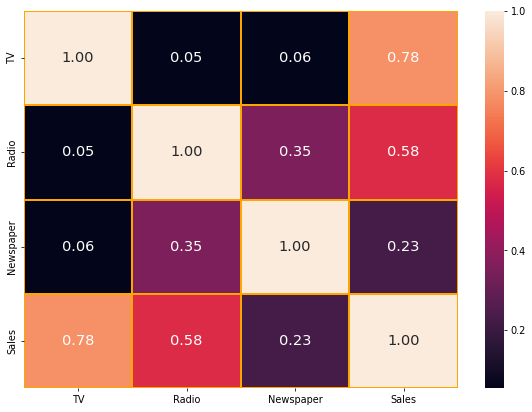

In [12]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (10, 7),dpi=70)
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

<Figure size 800x500 with 0 Axes>

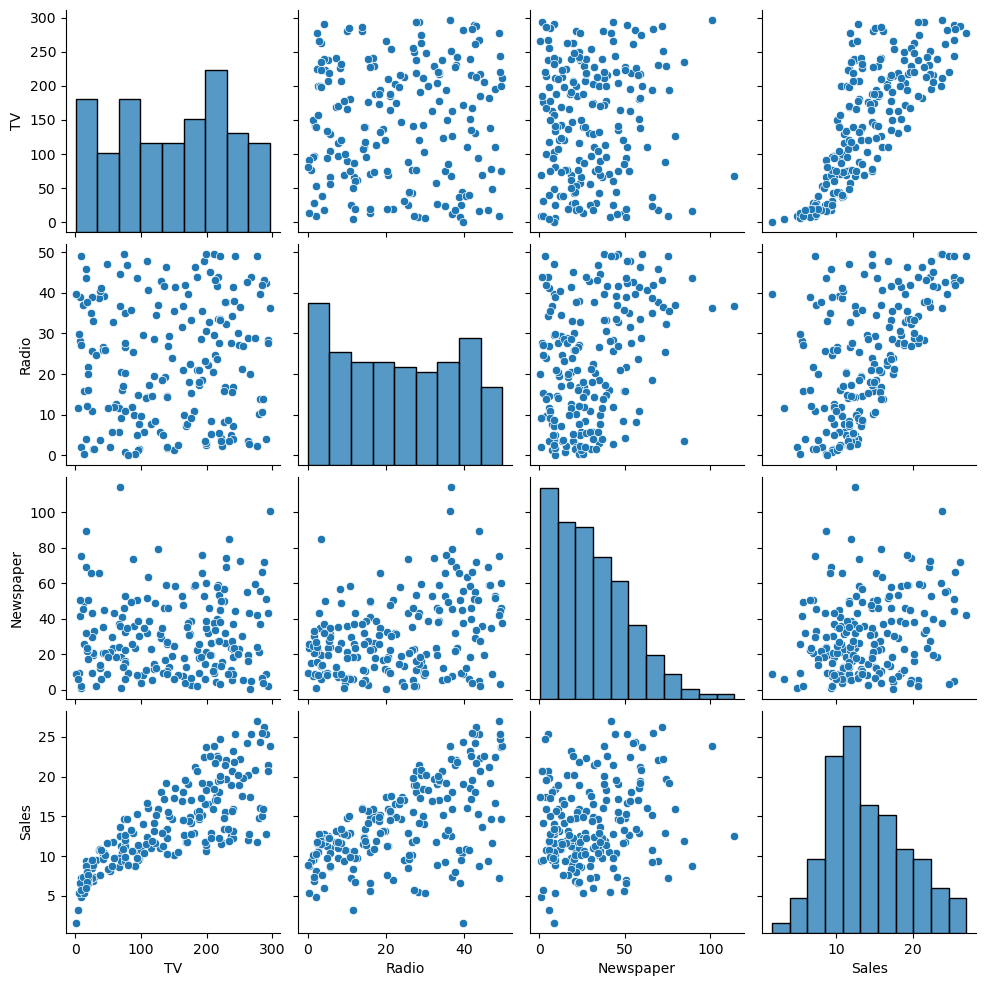

In [13]:
# Pair plot for all features 
plt.figure(figsize=(8,5),dpi=100)
sns.pairplot(df)

.


## Relation between advertisement medium and Sales

Text(0, 0.5, 'Sales')

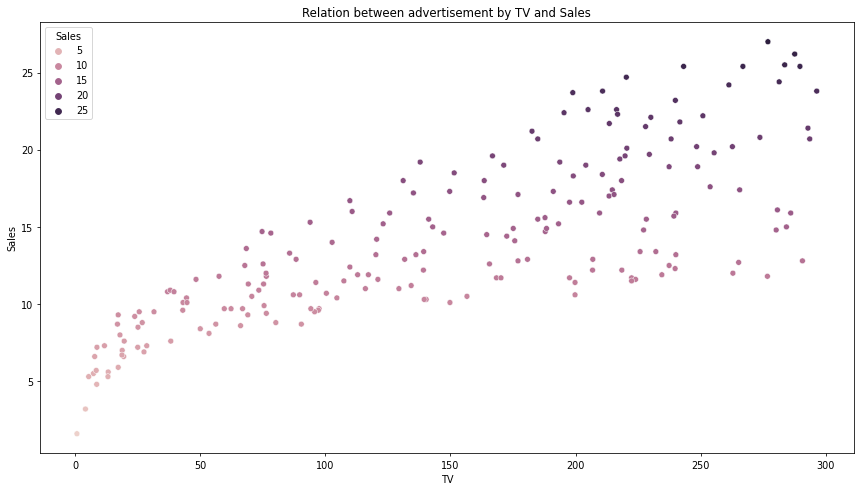

In [14]:
plt.figure(figsize=(15,8),dpi=70)
sns.scatterplot(data=df,x="TV",y="Sales",hue="Sales",markers=True)
plt.title("Relation between advertisement by TV and Sales")
plt.xlabel("TV")
plt.ylabel("Sales")

.

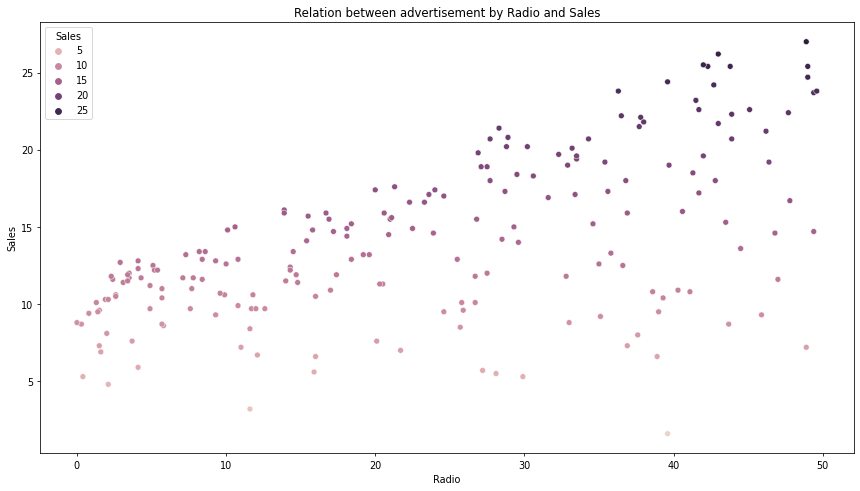

In [15]:
plt.figure(figsize=(15,8),dpi=70)
sns.scatterplot(data=df,x="Radio",y="Sales",hue="Sales",markers=True)
plt.title("Relation between advertisement by Radio and Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

.

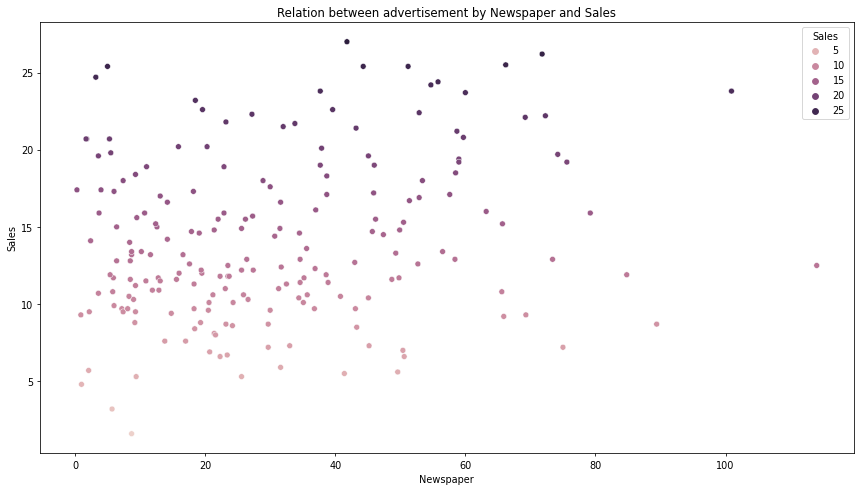

In [16]:
plt.figure(figsize=(15,8),dpi=70)
sns.scatterplot(data=df,x="Newspaper",y="Sales",hue="Sales",markers=True)
plt.title("Relation between advertisement by Newspaper and Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [17]:
df.corr()["Sales"].sort_values()

Newspaper    0.228299
Radio        0.576223
TV           0.782224
Sales        1.000000
Name: Sales, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(columns="Sales")           
Y= df["Sales"]    # Y = Sales

# split the data train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


# Different Ml algorithms
Here in this project we are using four ml algorithms which are following:


1.   Linear Regression.
2.   K-Nearest Neighbors Regressor(KNNR).
3.   Support Vector Regressor(SVR).
4.   Random Forest Regressor(RFR).


At the last we are using the only one algorithm which have highest accuracy for evaluating the result of our model. 


In [20]:
from sklearn.metrics import accuracy_score,r2_score,classification_report

scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.transform(X_test)

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
accuracy_list = []

In [23]:
linear_model = LinearRegression()
linear_model.fit(scaled_x_train, Y_train)

LinearRegression()

In [24]:
linear_model.coef_

array([3.85342355, 2.84437918, 0.05306231])

In [25]:
y_pred= linear_model.predict(scaled_x_test)
y_pred

array([16.38348211, 20.92434957, 21.61495426, 10.49069997, 22.17690456,
       13.02668085, 21.10309295,  7.31813008, 13.56732111, 15.12238649,
        8.92494113,  6.49924401, 14.30119928,  8.77233515,  9.58665483,
       12.09485291,  8.59621605, 16.25337881, 10.16948105, 18.85753401,
       19.5799036 , 13.15877029, 12.25103735, 21.35141984,  7.69607607,
        5.64686906, 20.79780073, 11.90951247,  9.06581044,  8.37295611,
       12.40815899,  9.89416076, 21.42707658, 12.14236853, 18.28776857,
       20.18114718, 13.99303029, 20.89987736, 10.9313953 ,  4.38721626,
        9.58213448, 12.6170249 ,  9.93851933,  8.06816257, 13.45497849,
        5.25769423,  9.15399537, 14.09552838,  8.71029827, 11.55102817])

# Evaluation of linear regression model

In [26]:
linear_reg_acc = r2_score(Y_test,y_pred)
accuracy_list.append(100*linear_reg_acc)

In [27]:
print(Fore.GREEN + "Accuracy of Linear Regression is : ", "{:.2f}%".format(100* linear_reg_acc))

Accuracy of Linear Regression is :  89.35%


## K-Nearest Neighbors Regressor(KNNR)

In [28]:
from sklearn.neighbors import  KNeighborsRegressor

In [29]:
test_error_rates=[]
for k in range(1,30):
    knn_model= KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(scaled_x_train,Y_train)
    y_knn_pred_test=knn_model.predict(scaled_x_test)
    test_error=1-r2_score(Y_test,y_knn_pred_test)
    test_error_rates.append(test_error);

In [30]:
test_error_rates

[0.10331049080284471,
 0.058826195831317096,
 0.073763159662531,
 0.06742153845152732,
 0.06976397497891051,
 0.06379087378068993,
 0.06554667697271988,
 0.05625667458533823,
 0.0731204651787617,
 0.0857866031634853,
 0.08773585485885227,
 0.09614811609923823,
 0.09879407329529011,
 0.10198598282034188,
 0.10882955299707642,
 0.11757717432682169,
 0.10791008372089661,
 0.11405581307885315,
 0.12098168926324449,
 0.1267504772499518,
 0.13200624802596694,
 0.13467067794053134,
 0.1380891378734811,
 0.14901329634420257,
 0.1549792536029635,
 0.1592175875573998,
 0.1682319352866769,
 0.1744206143994238,
 0.17346252690032216]

In [31]:
knn_model=KNeighborsRegressor(n_neighbors=2)
knn_model.fit(scaled_x_train,Y_train)
y_knn_pred=knn_model.predict(scaled_x_test)


# Evaluation of KNNR model

In [32]:
knn_acc =r2_score(Y_test,y_knn_pred)
accuracy_list.append(100*knn_acc)

In [33]:
print(Fore.GREEN + "Accuracy of KNNR is : ", "{:.2f}%".format(100*knn_acc))

Accuracy of KNNR is :  94.12%


## Support Vector Regressor

In [34]:
from sklearn.svm import SVR,LinearSVR
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1,10,20,50,100],'kernel':['linear','rbf','poly'],'gamma':['Scale','auto'],'degree':[2,3,4],'epsilon':[0,0.01,0.1,1]}

In [35]:
svr=SVR()
grid=GridSearchCV(svr,param_grid)

In [36]:
grid.fit(scaled_x_train,Y_train)

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 243, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Scale' instead.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\Surendra\anacond

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 20, 50, 100], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 1],
                         'gamma': ['Scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [37]:
grid.best_params_

{'C': 100, 'degree': 2, 'epsilon': 0, 'gamma': 'auto', 'kernel': 'rbf'}

In [38]:
final_model=SVR(C=100, degree=2, epsilon=0, gamma='auto', kernel='rbf')
final_model.fit(scaled_x_train,Y_train)

SVR(C=100, degree=2, epsilon=0, gamma='auto')

In [39]:
y_final_pred=final_model.predict(scaled_x_test)
y_final_pred

array([16.6300913 , 22.09792739, 20.22307119,  6.97681316, 23.60455718,
       12.68905904, 22.86744565,  8.42109738, 11.65349952, 15.41990262,
        7.16558213,  8.44511449, 16.30705363,  4.84027221, 10.20071469,
       12.05045596,  7.08687022, 16.37596906, 11.23214822, 19.04118271,
       20.85015688, 10.59192358, 10.66776295, 23.25025601,  9.13183323,
        7.51195964, 22.41389266, 12.64365883, 10.44426754,  4.19892788,
       11.04724785, 10.87449592, 22.63397026,  7.38014078, 15.85496568,
       21.19910421, 13.38165898, 20.85822298, 12.16145012,  5.96065122,
       10.56989482, 12.60741988, 10.14789517,  9.31041494, 11.30165122,
        6.5664509 , 10.51166081, 14.31433397, 10.53513818, 12.11301769])

# Evaluation of SVR model

In [40]:
svr_acc =r2_score(Y_test,y_final_pred)
accuracy_list.append(100*svr_acc)

In [41]:
print(Fore.GREEN + "Accuracy of SVR is : ", "{:.2f}%".format(100*svr_acc))

Accuracy of SVR is :  96.26%


.


## Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
RFR=RandomForestRegressor()
param_grid={'n_estimators' :[50,100,20,10,120],'criterion' : ["squared_error", "absolute_error", "poisson"],'min_samples_split' :[1,2,4,5,8],'max_features' : ["auto", "sqrt", "log2"] }
grid=GridSearchCV(RFR,param_grid)
grid.fit(scaled_x_train,Y_train)

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 1125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Surendra\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Surendra\anaconda3\l

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 4, 5, 8],
                         'n_estimators': [50, 100, 20, 10, 120]})

In [44]:
grid.best_params_

{'criterion': 'squared_error',
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 50}

In [45]:
RFR=RandomForestRegressor(criterion ='absolute_error', max_features='auto', min_samples_split= 2, n_estimators=100)

In [46]:
RFR.fit(scaled_x_train,Y_train)
y_preds=RFR.predict(scaled_x_test)

In [47]:
RFR_acc =r2_score(Y_test,y_preds)
accuracy_list.append(100*RFR_acc)

In [48]:
print(Fore.GREEN + "Accuracy of RFR is : ", "{:.2f}%".format(100*RFR_acc))

Accuracy of RFR is :  98.01%


# Accuracy graph

In [49]:
Accuracy={'Linear Regression':accuracy_list[0],'K-Nearest Neighbors Regressor':accuracy_list[1] ,'Support Vector Regressor':accuracy_list[2],'Random Forest Regressor':accuracy_list[3]}

In [50]:
Accuracy

{'Linear Regression': 89.35163320163659,
 'K-Nearest Neighbors Regressor': 94.11738041686829,
 'Support Vector Regressor': 96.2621185991813,
 'Random Forest Regressor': 98.00545014416586}

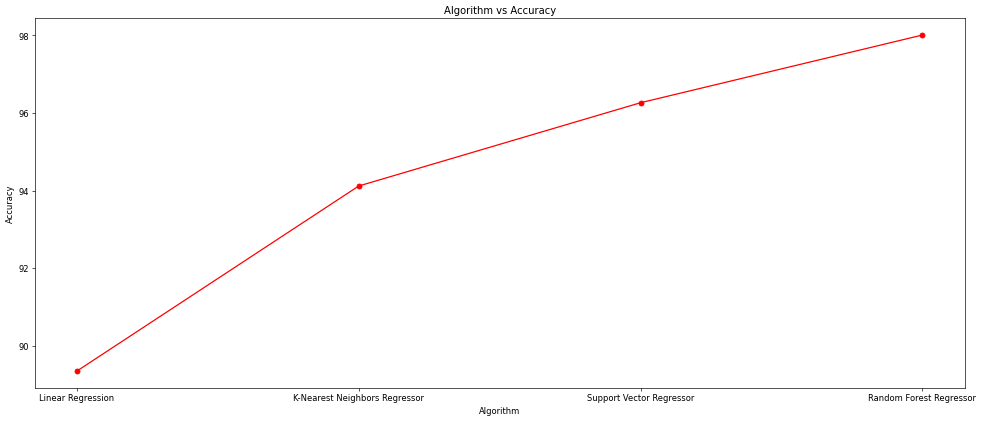

In [51]:
plt.figure(figsize=(20,8),dpi=60)
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(Accuracy.keys(),Accuracy.values(),marker='o',color='red')
plt.show()

# Final evaluation of our model
 Here we can see that Random Forest Regressor gives us the highest accuracy for our model which is 98 % .
*   So we will use the Random Forest Regressor model for predicting the result in our model.






## Saving the model

In [52]:
import pickle

In [53]:
with open('Sales_Prediction_model.pkl','wb') as file:
    pickle.dump(knn_model,file)